In [94]:
import pandas
Sale = pandas.read_csv('supermarket_sales - Sheet1.csv')

In [95]:
Sale.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


COGS: Cost of goods sold / Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)
/Total: Total price including tax/Branch: Branch of supercenter (3 branches are available identified by A, B and C)./Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Total - cogs = gross_income

DATA CLEANING

In [96]:
Sale.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

All columns have no missing values 

In [97]:
Sale['date_time'] = Sale['Date'] + " " + Sale['Time']

In [98]:
Sale['date_time'] = pandas.to_datetime(Sale['date_time'])

In [99]:
Sale = Sale.drop(['Date','Time'],axis =1)

In [100]:
Sale.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00


We have concated two columns ['date'] and ['time'] to one column named ['date_time']

Data_Visualization 

In [101]:
Sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [102]:
Sale['month'] = Sale['date_time'].dt.month 

In [103]:
by_month = Sale.groupby('month').agg({"Total" :['sum','mean']})
by_month.columns = ['Sum total','Avg total']
by_month =pandas.DataFrame(by_month)
by_month.reset_index(inplace=True)

In [104]:
by_month

,month,Sum total,Avg total
0,1,116291.868,330.374625
1,2,97219.374,320.856020
2,3,109455.507,317.262339


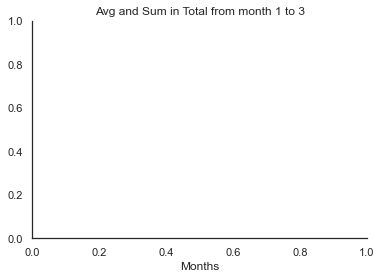

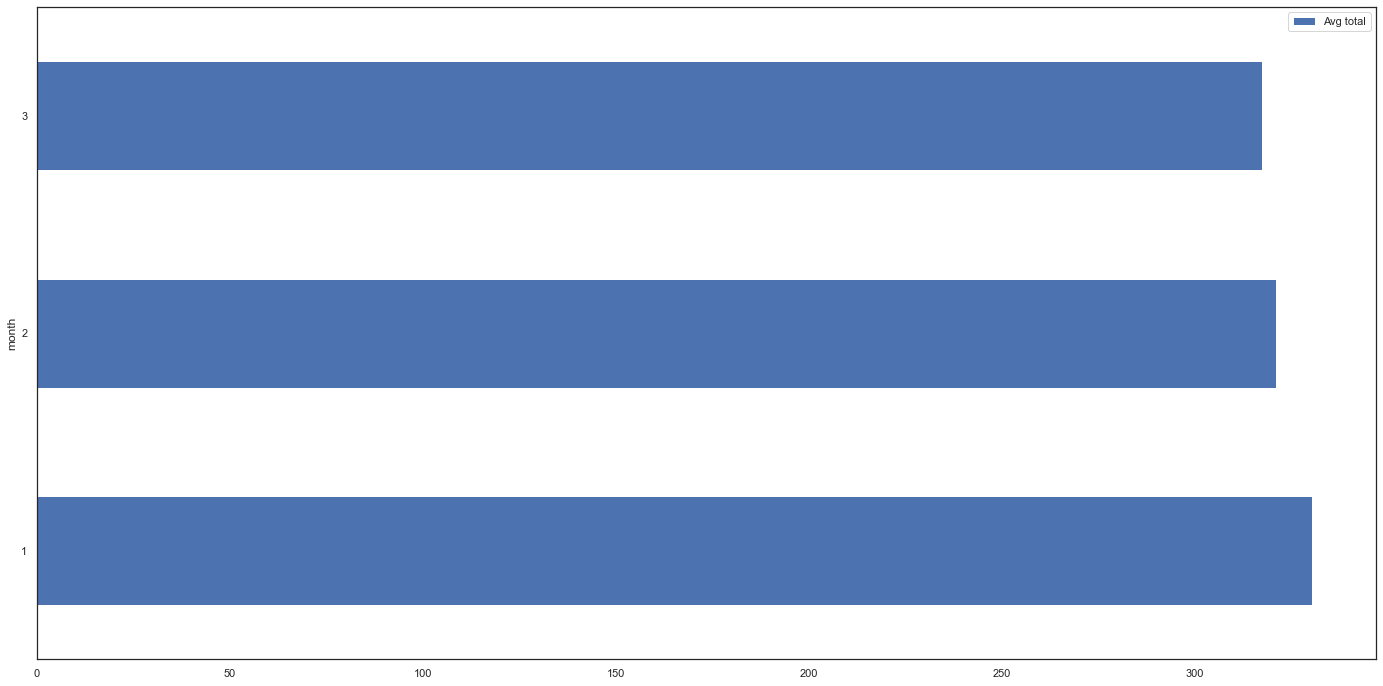

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots()
ax1 = by_month.plot(x='month',y='Avg total',kind='barh',figsize=(24,12))
ax.set_title('Avg and Sum in Total from month 1 to 3')
ax.set_xlabel('Months')

for where in ("top", "right"):
    ax.spines[where].set_visible(False)
    ax.tick_params(right=False, labelright=False)


The avg for total money that people spend on stuff are nearly the same for 3 months 

In [106]:
by_branch = Sale.groupby('Branch').agg({"cogs":'mean','gross income' : 'mean'})
by_branch =pandas.DataFrame(by_branch)
by_branch.reset_index(inplace=True)
by_branch

,Branch,cogs,gross income
0,A,297.480029,14.874001
1,B,304.640482,15.232024
2,C,321.047348,16.052367


Text(0.5, 1.0, 'Gross income of each branchs')

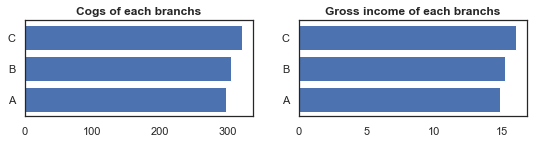

In [107]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.barh(by_branch['Branch'],by_branch['cogs'])
plt.title('Cogs of each branchs', weight='bold')

plt.subplot(3,2,2)
plt.barh(by_branch['Branch'],by_branch['gross income'])
plt.title('Gross income of each branchs', weight='bold')

Although the branch C has the highest cogs but they still obtain the highest gross income among 3 branchs 

In [108]:
by_branch_rating = Sale.groupby('Branch').agg({"Rating":'mean'})
by_branch_rating =pandas.DataFrame(by_branch_rating)
by_branch_rating.reset_index(inplace=True)
x = by_branch_rating['Branch']
y = by_branch_rating['Rating']

In [109]:
by_branch_rating

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


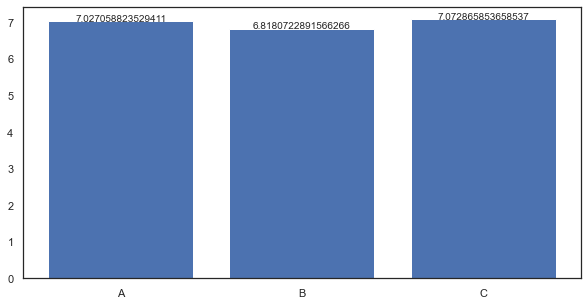

In [110]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
# setting figure size by using figure() function 
plt.figure(figsize = (10, 5))
      
# making the bar chart on the data
plt.bar(x, y)
      
# calling the function to add value labels
addlabels(x, y)

Among three branchs,C has the highest avg of ratings but its value is nearly equal to A's avg rating

In [111]:
Sale.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3


In [112]:
Sale['date_time'].dt.hour.value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: date_time, dtype: int64

In [113]:
#10,11,12,13,14,15
#16,17,18,19,20

In [114]:
day = Sale.copy()[(Sale['date_time'].dt.hour >= 10) & (Sale['date_time'].dt.hour < 15)]
print(day.shape)

night = Sale.copy()[(Sale['date_time'].dt.hour >= 16) & (Sale['date_time'].dt.hour < 20)]
print(night.shape)

(466, 17)
(357, 17)


In [115]:
day.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3


In [116]:
day_Product_line = day['Product line'].value_counts()
night_Product_line = night['Product line'].value_counts()

Text(0.5, 1.0, 'Frequency of stuff in night')

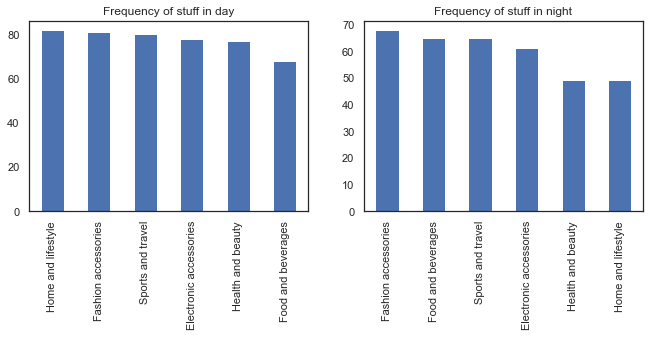

In [117]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
day_Product_line.plot.bar()
plt.title('Frequency of stuff in day')

plt.subplot(1, 2, 2)
night_Product_line.plot.bar()
plt.title('Frequency of stuff in night')

During day time,people tend to buy more Home and lifestyle.During nighttime,Fashion accessories are popular for consumers

In [118]:
day.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,2
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00,2


In [119]:
day['Total'].sum() 

153416.31900000002

In [120]:
night['Total'].sum()

115401.3945

In regardless of cities where people live,consumers have same common to spend more money during day time more than nighttime

In [121]:
day_payment = day['Payment'].value_counts(normalize = True) *100
night_payment = night['Payment'].value_counts(normalize = True) *100

Text(0.5, 1.0, 'Frequency of payment in night')

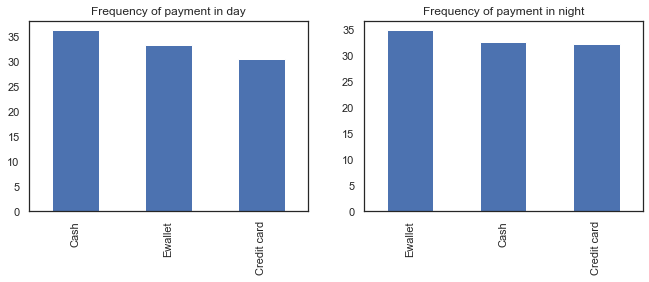

In [122]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
day_payment.plot.bar()
plt.title('Frequency of payment in day')

plt.subplot(1, 2, 2)
night_payment.plot.bar()
plt.title('Frequency of payment in night')

During daytime,with above 35%,cosumers are highly to pay by their cash.During nighttime,with above 35%,cosumers often pay with their Ewallet

In [123]:
Sale['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [124]:
Yangon = Sale.copy()[Sale['City'] == 'Yangon']
Naypyitaw = Sale.copy()[Sale['City'] == 'Naypyitaw']
Mandalay = 	Sale.copy()[Sale['City'] == 'Mandalay']

In [125]:
F_and_M_1 = Yangon.groupby('Gender').agg({"Total":'mean'})
F_and_M_1 =pandas.DataFrame(F_and_M_1)
F_and_M_1.reset_index(inplace=True)

F_and_M_2 = Naypyitaw.groupby('Gender').agg({"Total":'mean'})
F_and_M_2 =pandas.DataFrame(F_and_M_2)
F_and_M_2.reset_index(inplace=True)

F_and_M_3 = Mandalay.groupby('Gender').agg({"Total":'mean'})
F_and_M_3 =pandas.DataFrame(F_and_M_3)
F_and_M_3.reset_index(inplace=True)

In [126]:
F_and_M_1

,Gender,Total
0,Female,330.864391
1,Male,295.705047


Text(0.5, 1.0, 'Avg spend from Naypyitaw')

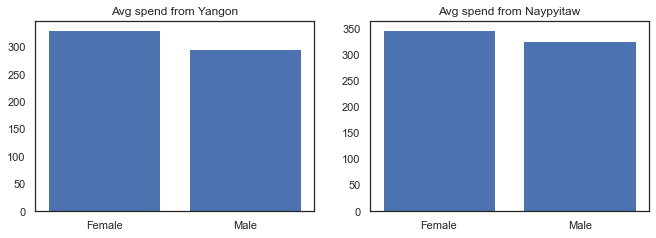

In [127]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.bar(F_and_M_1['Gender'],F_and_M_1['Total'])
plt.title('Avg spend from Yangon')

plt.subplot(1, 2, 2)
plt.bar(F_and_M_2['Gender'],F_and_M_2['Total'])
plt.title('Avg spend from Naypyitaw')


Text(0.5, 1.0, 'Avg spend from Mandalay')

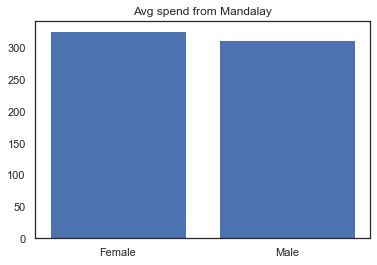

In [128]:
plt.bar(F_and_M_3['Gender'],F_and_M_3['Total'])
plt.title('Avg spend from Mandalay')

As we can see from 3 bar chart above,Female are slightly pay more money than Male do 

In [129]:
Sale['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [130]:
Member = Sale.copy()[Sale['Customer type'] == 'Member']
Normal = Sale.copy()[Sale['Customer type'] == 'Normal']

Text(0.5, 1.0, 'Frequency of stuff bought by Normal')

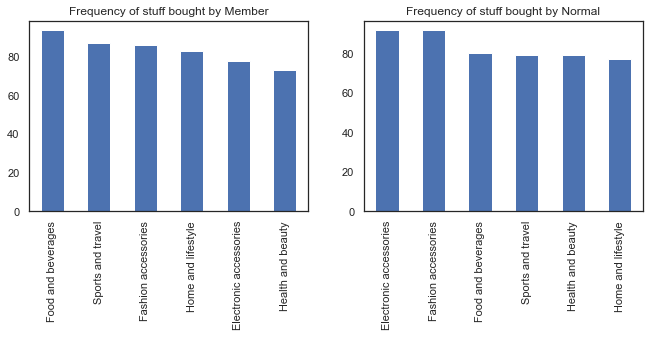

In [131]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
Member['Product line'].value_counts().plot.bar()
plt.title('Frequency of stuff bought by Member')

plt.subplot(1, 2, 2)
Normal['Product line'].value_counts().plot.bar()
plt.title('Frequency of stuff bought by Normal')

From 2 bar charts above,customers who are Member tend to buy Food and beverages at the highest rate.Electronic accessories and Fashion are two most fascinating stuff for customers who are Normal

Building machine learning model to predict which payment methods the customers will use

In [132]:
Sale['hour'] = Sale['date_time'].dt.hour

In [133]:
Sale['week_day'] = Sale['date_time'].dt.weekday

In [134]:
Sale['week_day'].value_counts()
#0:monday

5    164
1    158
2    143
4    139
3    138
6    133
0    125
Name: week_day, dtype: int64

In [135]:
status_replace ={
    'week_day' :{
         0 : 'Monday',
         1  : 'Tuesday',
         2 : 'Wednesday',
         3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday',
    }
}
Sale = Sale.replace(status_replace)

In [136]:
Sale.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date_time,month,hour,week_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,3,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,3,13,Sunday


In [137]:
Sale['hour'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

In [138]:
def process_time(df,cut_points,label_names):
    df["hour_categories"] = pd.cut(df["hour"],cut_points,labels=label_names)
    return df
cut_points = [0,10,12,16,20]
label_names = ["Morning","lunch","Evening","night"]

Sale = process_time(Sale,cut_points,label_names)


In [139]:
Sale = Sale.drop('hour',axis=1)

In [140]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
Sale = create_dummies(Sale,'month')
Sale = create_dummies(Sale,'hour_categories')
Sale = create_dummies(Sale,'week_day')
Sale = create_dummies(Sale,'Branch')
Sale = create_dummies(Sale,'City')
Sale = create_dummies(Sale,'Customer type')
Sale = create_dummies(Sale,'Gender')
Sale = create_dummies(Sale,'Product line')

In [141]:
Sale = Sale.drop(['month', 'week_day', 'hour_categories','date_time'],axis= 1)

In [142]:
def process_rating(df,cut_points,label_names):
    df["rating_categories"] = pd.cut(df["Rating"],cut_points,labels=label_names)
    return df
cut_points = [0,5,7,10]
label_names = ["Bad","Medium","Good"]

Sale = process_rating(Sale,cut_points,label_names)

In [143]:
Sale = create_dummies(Sale,"rating_categories")

In [144]:
Sale = Sale.drop(['Rating',"rating_categories",'Branch', 'City', 'Customer type','Gender',
       'Product line'],axis= 1)

In [145]:
Sale.columns

Index(['Invoice ID', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'month_1', 'month_2',
       'month_3', 'hour_categories_Morning', 'hour_categories_lunch',
       'hour_categories_Evening', 'hour_categories_night', 'week_day_Friday',
       'week_day_Monday', 'week_day_Saturday', 'week_day_Sunday',
       'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday',
       'Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Member', 'Customer type_Normal',
       'Gender_Female', 'Gender_Male', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'rating_categories_Bad',
       'rating_categories_Medium', 'rating_categories_Good'],
      dtype='object')

There are many 'int' of 'float' type columns left.We will keep 'Unit price', 'Quantity', 'Tax 5%', 'Total','cogs','gross income' and keep 'Payment' column as Target

In [146]:
features = Sale.columns
features = features.drop(['Invoice ID','Payment','gross margin percentage'])

In [147]:
len(features)

39

In [148]:
status_replace = {
    "Payment" : {
        "Ewallet": 0,
        "Cash": 1,
        "Credit card":2,
    }
}

Sale = Sale.replace(status_replace)

In [149]:
Sale['Payment'].value_counts()

0    345
1    344
2    311
Name: Payment, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\1605705755.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


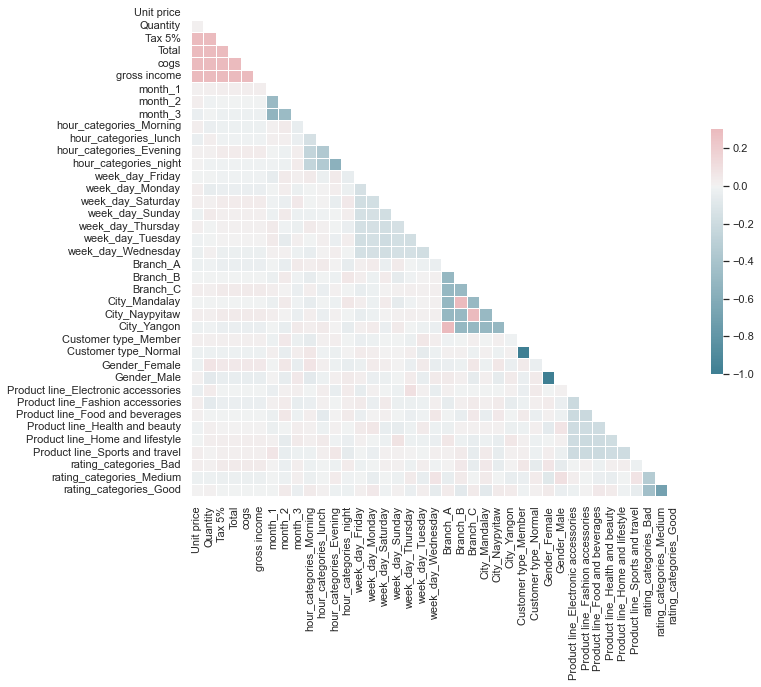

In [150]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(Sale[features])

It seem like there is no Collinearity between these features 

In [151]:
half_len = int(len(Sale)/2)
half_len

500

In [152]:
train = Sale[:half_len]
test = Sale[half_len:]

We will use RFECVto selects the set of features which score highest

In [153]:
from sklearn.feature_selection import RFECV


all_X = train[features]
all_y = train["Payment"]
lr = LogisticRegression(solver='lbfgs', max_iter=120000)
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]

In [154]:
len(optimized_columns)

15

From 36 features,the RFECV did the cross validation and choose 15 features that fit our model the most

In [155]:
unique = Sale['Payment'].unique()
unique

array([0, 1, 2], dtype=int64)

In [156]:
models ={}
for origin in unique:
    model = LogisticRegression()
    X_train = train[optimized_columns]
    Y_train = train['Payment'] == origin
    model.fit(X_train,Y_train)
    models[origin] = model 
testing = pd.DataFrame(columns= unique)

for origin in unique:
    testing[origin] = models[origin].predict_proba(test[optimized_columns])[:,1]


In [157]:
testing

,0,1,2
0,0.254547,0.604401,0.167598
1,0.222752,0.389149,0.385438
2,0.265776,0.455555,0.265072
3,0.362186,0.364289,0.262795
4,0.333319,0.459889,0.207932
...,...,...,...
495,0.424507,0.416965,0.173414
496,0.424615,0.331152,0.246355
497,0.309054,0.327812,0.351566
498,0.377782,0.312497,0.291718


Testing df contains the probability for payment method that customers will use 


In [158]:
predicted_origin = testing.idxmax(axis=1)

In [163]:
predicted = predicted_origin.to_list()

In [164]:
test['predicted'] = predicted

C:\Users\Admin\AppData\Local\Temp\ipykernel_9456\3478655092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predicted


In [176]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test['Payment'],predicted_origin)
print(accuracy)

0.324


The accuracy from the above model we use is 32.4%

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Payment"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(solver='lbfgs', max_iter=1000),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(Sale,optimized_columns)

LogisticRegression
------------------
Best Score: 0.33899999999999997
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.377
Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.363
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4}



We can use KNeighborsClassifier model to increase our accuracy model to nearly 38%